# Práctica 1 Introducción al Machine Learning. Métricas de clasificación y regresión (II).

# Secuencia de tareas o "pipeline" en ciencia de datos y en machine learning.

En la sesión anterior trabajamos en varias de las tareas del "pipeline" de un proyecto de machine learning. En particular vimos:

- Cómo visualizar datos, lo que ayuda a analizar su estructura y seleccionar un buen modelo.
- Entrenar un modelo y realizar un ajuste fino para seleccionar los mejores hiperparámetros. Para ello utilizamos una serie de métricas.
- Comprobamos la capacidad de generalización del modelo.
- Evaluamos si era necesario obtener más datos para mejorar el rendimiento del modelo seleccionado.


En esta sesión vamos a seguir trabajando en varios de los pasos del proyecto de machine learning.

- Aplicaremos las métricas un caso de clasificación con dos características y dos clases y con un modelo más complejo.
- Aprenderemos cómo generar conjuntos de entrenamiento y test de forma estratificada.
- Veremos cómo realizar una selección más amplia y precisa de los modelos y de los hiperparámetros. 
- Al igual que en la sesión anterior, trabajaremos con problemas de clasificación y regresión.



![Flujo de tareas pipeline machine learning.png](<attachment:Flujo de tareas pipeline machine learning.png>)

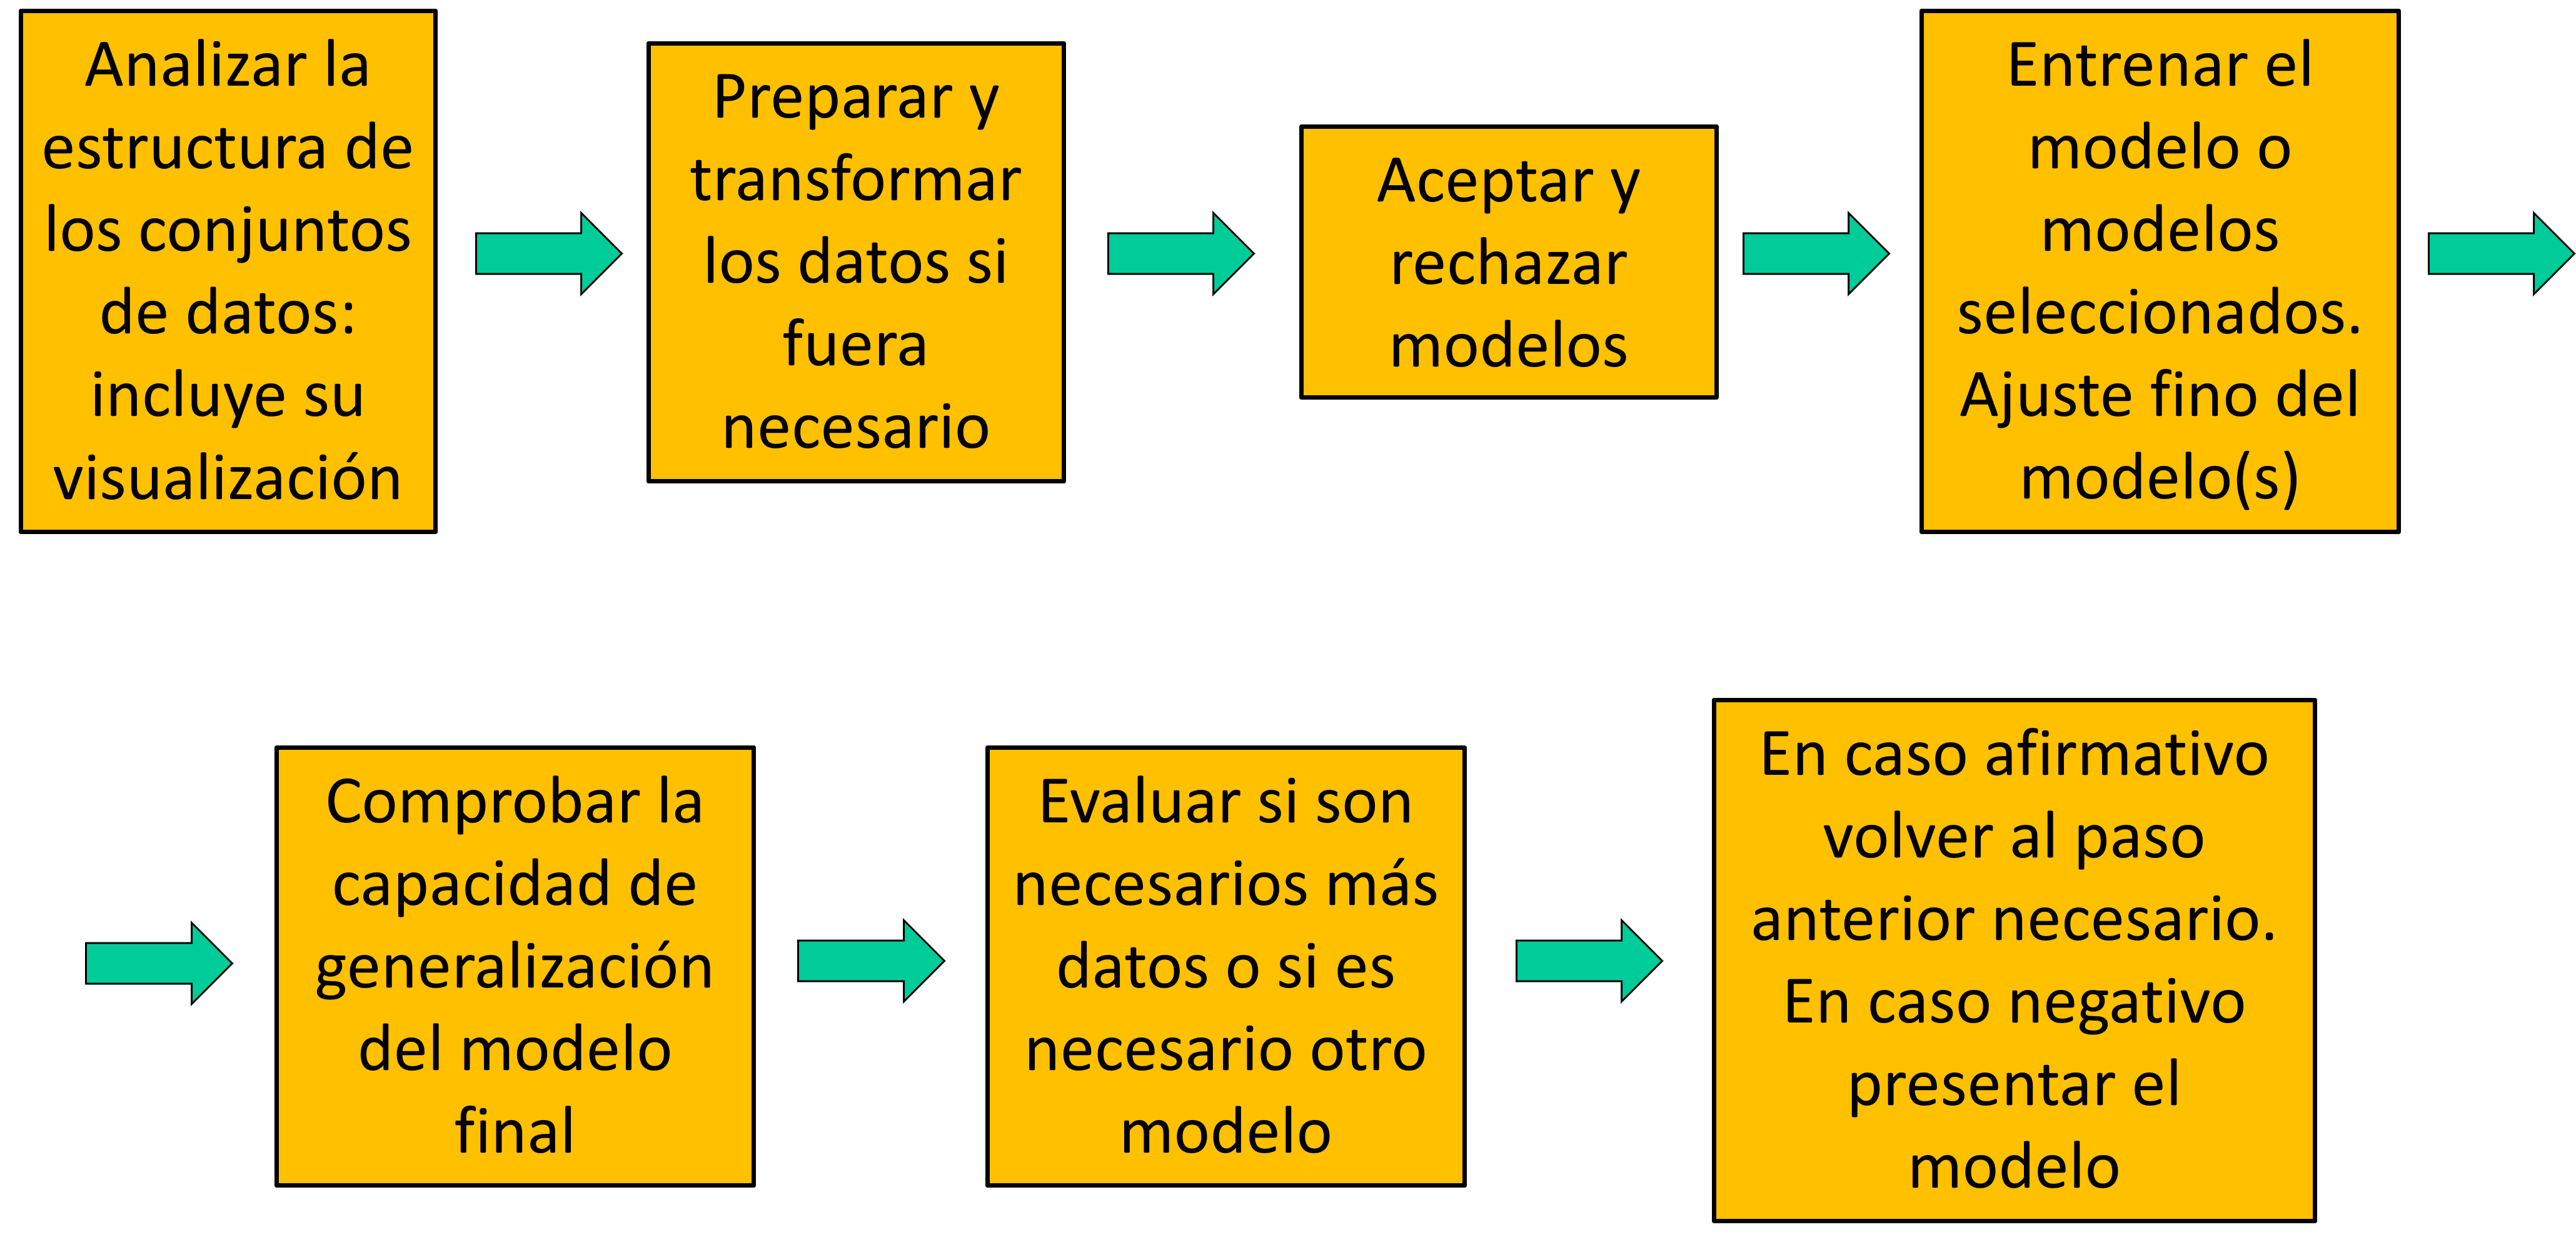

## Importación de bibliotecas. 

Como en la primera sesión, el primer paso consiste en importar las biliotecas auxiliares.  

In [1]:
# Importación de bibliotecas auxiliares
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

## Métricas para clasificación. 



**Caso de clasificación: dos características y dos clases**

En primer lugar vamos a generar mediante *make_classification()* un caso de clasificación con dos características y dos clases. Este ejemplo nos servirá para:

- Dibujar la frontera de decisión entre las dos clases.
- Seguir trabajando con las métricas.
- Trabajar con la generación de conjuntos de entrenamiento y test en un problema de clasificación para comprobar la capacidad de generalización de la técnica.
- Generar conjuntos de entrenamiento y de test de forma estratificada.
- Comprobar el rendimiento de dos métodos diferentes de clasificación en el mismo conjunto de datos.
- Aplicar técnicas para seleccionar el mejor modelo y el mejor conjunto de hiperaparámetros.

En la siguiente celda de código generamos los datos de las dos clases y visualizamos los datos.

[0 1 0 0 0]


Text(0, 0.5, 'Característica x2')

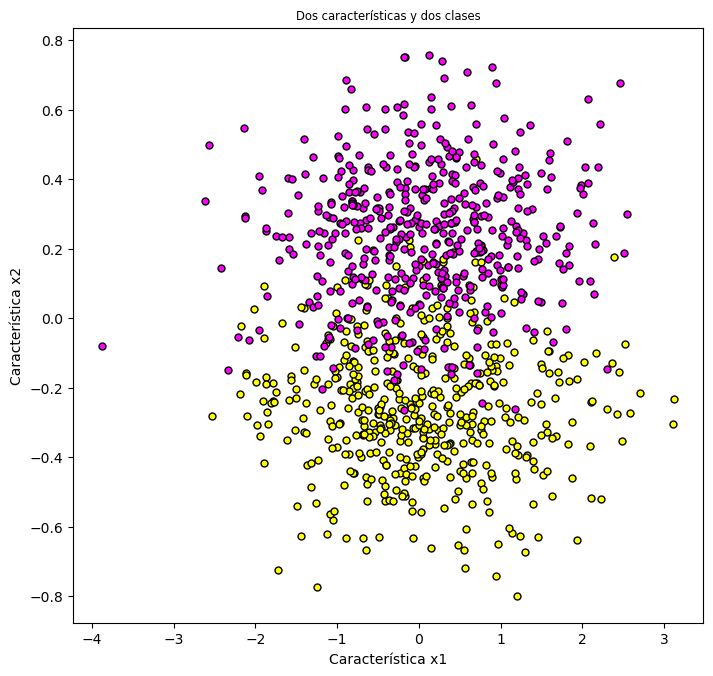

In [2]:
# Importamos la clase necesaria
from sklearn.datasets import make_classification

# Inicializamos la semilla para reproducibilidad
np.random.seed(1234)


# Número de puntos
numero_puntos = 1000

# Generamos las dos clases
x, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=0.25)

# Características (features)
x1 = x[:,0]
x2 = x[:,1]
# Y son las etiquetas: valores de 0 y 1. 
# De nuevo una clase está definida con un 0 y la otra clase con un 1
print(y[0:5])

# Dibujamos los ejemplos de las dos clases
plt.figure(figsize=(7, 7))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.title("Dos características y dos clases", fontsize="small")
x1_clase_0 = x1[y==0]
x2_clase_0 = x2[y==0]
color_clase_0 = 'yellow'
plt.scatter(x1_clase_0, x2_clase_0, marker="o", c=color_clase_0, s=25, edgecolor="k")
x1_clase_1 = x1[y==1]
x2_clase_1 = x2[y==1]
color_clase_1 = 'magenta'
plt.scatter(x1_clase_1, x2_clase_1, marker="o", c=color_clase_1, s=25, edgecolor="k")
#plt.scatter(x1, x2, marker="o", c=y, s=25, edgecolor="k")

plt.xlabel('Característica x1')
plt.ylabel('Característica x2')

**Frontera de decisión**

En la siguiente celda se muestra el código para generar la frontera de decisión en el problema de clasificación de dos clases con dos características con un clasificador lineal entrenado con el algoritmo SGD.

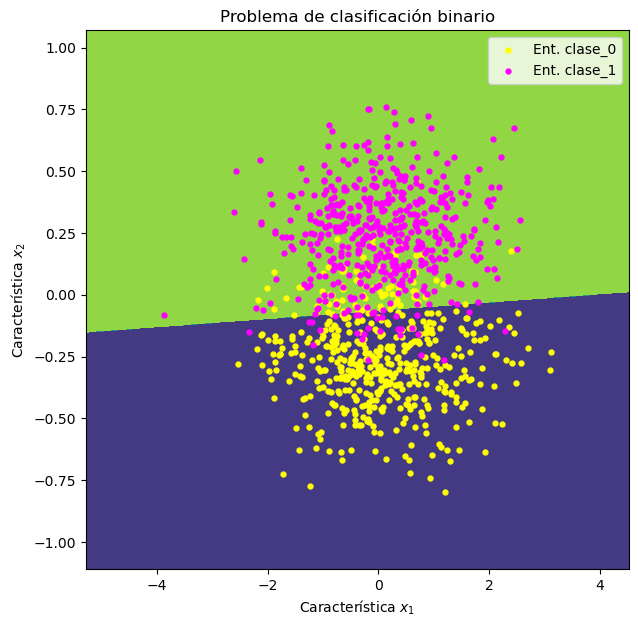

In [3]:
# Importamos la clase de la técnica de clasificación de Machine Learning que vamos a emplear
from sklearn.linear_model import SGDClassifier

# Instanciamos el clasificador lineal entrenado con SGD
clasificador_sgd = SGDClassifier()

# Estimación de los parámetros del modelo para el conjunto de datos
clasificador_sgd.fit(x, y)

# Predicción de los valores. y_sal son los valores de salida del clasificador
# La salida del clasificador produce valores de 0 o de 1
y_sal = clasificador_sgd.predict(x)


# Frontera de decisión: definimos una función para reutilizar el código
def dibuja_frontera_decision(Entradas, modelo, Salidas, clase_0, clase_1, 
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera):
    '''Dibuja las clases y la frontera de decisión generada por la 
    técnica de machine learning'''

    if (adicion_frontera == 1):
        minX1 = min(Entradas[:, 0])                                     # Valor mínimo de la 1ª característica
        maxX1 = max(Entradas[:, 0])                                     # Valor máximo de la 1ª característica
        minX2 = min(Entradas[:, 1])                                     # Valor mínimo de la 2ª característica
        maxX2 = max(Entradas[:, 1])                                     # Valor máximo de la 2ª característica
        marginX1 = (maxX1 - minX1) * 0.2                                # 20% del rango
        marginX2 = (maxX2 - minX2) * 0.2                                # para las dos características
        x1 = np.linspace(minX1 - marginX1, maxX1 + marginX1, 1000)      # Vector de coord. X
        x2 = np.linspace(minX2 - marginX2, maxX2 + marginX2, 1000)      # Vector de coord. Y
        X1, X2 = np.meshgrid(x1, x2)                                    # Generamos las matrices de coordenadas

        # Concatenación con np.c_
        Y = modelo.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

        
        plt.contourf(X1, X2, Y,levels = 2)

    condicion = Salidas == clase_0
    entradas_clase_0 = Entradas[condicion]
    x1_0 = entradas_clase_0[:,0]
    x2_0 = entradas_clase_0[:,1]
    color_cero = colores[0] 
    plt.scatter(x1_0, x2_0, marker=simbolo, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)

    condicion = Salidas == clase_1
    entradas_clase_1 = Entradas[condicion]
    x1_1 = entradas_clase_1[:,0]
    x2_1 = entradas_clase_1[:,1]
    color_uno = colores[1]
    plt.scatter(x1_1, x2_1, marker=simbolo, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0  
clase_1 = 1
# Clase 0 en amarillo, clase 1 en magenta
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Problema de clasificación binario"
titulo_eje_x = r"Característica $x_1$"
titulo_eje_y = r"Característica $x_2$"
simbolo = '.'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x, clasificador_sgd, y, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)



Text(0.5, 0, 'Etiquetas')

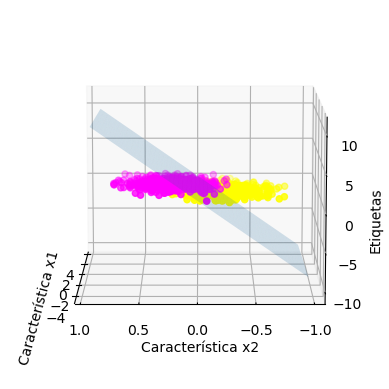

In [4]:
# Dibujamos el plano que genera el clasificador
from mpl_toolkits import mplot3d

# Figura
plt.figure()
ax = plt.axes(projection='3d')

Salidas_clase_0 =  y[y == 0]
Salidas_clase_1 =  y[y == 1]

# Valores de las etiquetas que corresponden a la clase 0
x_0 = x[y == 0]
x1_0 = x_0[:,0]
x2_0 = x_0[:,1]

# Valores de las etiquetas que corresponden a la clase 1
x_1 = x[y == 1]
x1_1 = x_1[:,0]
x2_1 = x_1[:,1]

# Puntos de cada clase: en amarillo la clase 0, en magenta la clase 1
ax.scatter(x1_0, x2_0, Salidas_clase_0, marker='o', color='yellow')
ax.scatter(x1_1, x2_1, Salidas_clase_1, marker='o', color='magenta')


minX1 = min(x[:, 0])       # Valor mínimo de la 1ª característica
maxX1 = max(x[:, 0])       # Valor máximo de la 1ª característica
minX2 = min(x[:, 1])       # Valor mínimo de la 2ª característica
maxX2 = max(x[:, 1])       # Valor máximo de la 2ª característica
# 10% del rango (se puede variar, para clarificar la figura)
peso = +0.1
marginX1 = (maxX1 - minX1) * peso  
marginX2 = (maxX2 - minX2) * peso  

x1 = np.linspace(minX1 - marginX1, maxX1 + marginX1, 1000)  # Vector de coord. X
x2 = np.linspace(minX2 - marginX2, maxX2 + marginX2, 1000)  # Vector de coord. Y

X1, X2 = np.meshgrid(x1, x2)       # Generamos las matrices de coordenadas


# Concatenación con np.c_
Z = clasificador_sgd.decision_function(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

# Dibujamos el plano que genera el clasificador lineal para diferencias las clases
ax.plot_surface(X1, X2, Z, alpha=0.2)
ax.view_init(elev=10, azim=180)

ax.set_xlabel('Característica x1')
ax.set_ylabel('Característica x2')
ax.set_zlabel('Etiquetas')

**Ejercicio 1: frontera de decision**

¿Qué forma tiene la frontera de decisión? ¿Por qué tiene esa forma? 

¿Existen casos de datos de entrada mal clasificados? Cite uno de cada clase e indique por qué están mal clasificados.

<font color=007AFF>La frontera de decisión es una linea recta en un espacio de dos dimensiones debido a la naturaleza del algoritmo de clasificación lineal que intenta separar las clases de la mejor manera posible. 


</font>

**Ejercicio 2: valores de las métricas para el caso de dos características**

Escriba el código para obtener el acierto del clasificador entrenado y el resto de métricas: exactitud, precisión y sensibilidad. Reutilice el código de la sesión anterior.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Asumiendo que y son las etiquetas reales y y_sal son las predicciones del modelo
accuracy = accuracy_score(y, y_sal)
precision = precision_score(y, y_sal)
recall = recall_score(y, y_sal)

print(f'Accuracy (Acierto): {accuracy}')
print(f'Precision: {precision}')
print(f'Recall (Sensibilidad): {recall}')

Accuracy (Acierto): 0.885
Precision: 0.8478260869565217
Recall (Sensibilidad): 0.9378757515030061


**Ejercicio 3: gráfica de precisión vs. sensibilidad y curva ROC**

Obtenga la gráfica de precisión vs. sensibilidad y la curva ROC, obtenga también el valor de AUC.

¿A la vista de los resultados, se puede calificar como un buen clasificador?

El área bajo la curva es (AUC):
0.8851


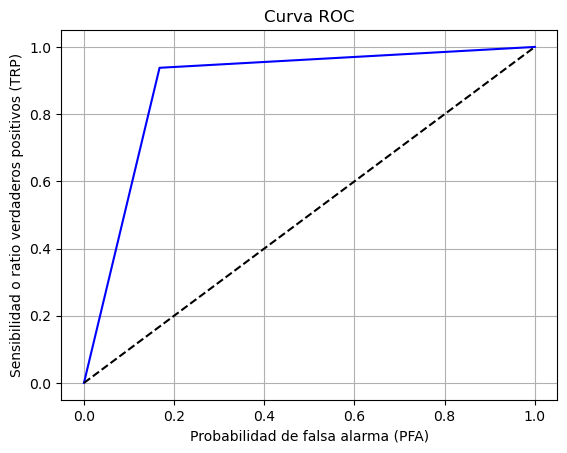

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Valores para construir la curva ROC. Los argumentos de entrada de roc_curve son los 
# mismos que en precision_recall_curve
prob_falsa_alarma, ratio_verdaderos_positivos, umbrales = roc_curve(y, y_sal)

def dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos):
    plt.plot(prob_falsa_alarma, ratio_verdaderos_positivos, "b-", )
    plt.plot([0, 1], [0, 1], 'k--') # Diagonal

    plt.title('Curva ROC')
    plt.xlabel('Probabilidad de falsa alarma (PFA)')
    plt.ylabel('Sensibilidad o ratio verdaderos positivos (TRP)')
    plt.grid()

dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos)

print('El área bajo la curva es (AUC):')
AUC = roc_auc_score(y, y_sal)
decimales = 4
print(round(AUC,decimales))

**Nueva técnica de machine learning**

A continuación aplicaremos una nueva técnica de machine learning para ver si conseguimos un rendimiento mejor. La técnica es la de "Random Forest":  esta técnica hace uso de un conjunto de árboles de decisión, que son construidos con un cierto grado de aleatoriedad, y decide la salida según el conjunto total de árboles de decisión construidos. No vamos a explicar esta técnica, simplemente tenemos que saber que es una técnica más compleja que el clasificador lineal empleado anteriormente.

La técnica de "Random Forest" no calcula un valor real para cada etiqueta tal como hacía el clasificador lineal, sino que estima la probabilidad de pertenencia a cada clase. Es decir, si existen dos posibles clases, dado un ejemplo o dato de entrada, el clasificador de Random Forest" estima la probabilidad de pertenencia de la clase 0 y la clase 1 y en base a las probabilidades da un valor de 0 o 1 a la salida. 

Para emplear esta técnica en tareas de clasificación hay que importar la clase *RandomForestClassifier()*, que, como todo estimador, posee los métodos *fit()* y *predict()*. En la siguiente celda de código se estiman los parámetros y se realiza la predicción. En lugar del método *decision_function()* posee el método *predict_proba()* que permite obtener las probabilidades de pertenencia.

In [7]:
# Importamos la clase RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciamos la clase
clasificador_random_forest = RandomForestClassifier()

# Estimamos los parámetros 
clasificador_random_forest.fit(x, y)

# Predicción y probabilidades en cada ejemplo
y_sal = clasificador_random_forest.predict(x)
y_sal_probabilidades = clasificador_random_forest.predict_proba(x)

# Vemos algunos datos por pantalla
print('Etiquetas')
print(y[:10])
print()
print('Salidas del clasificador')
print(y_sal[:10])
print()
print('Probabilidades de cada clase')
print(y_sal_probabilidades[:10])

Etiquetas
[0 1 0 0 0 1 1 1 1 1]

Salidas del clasificador
[0 1 0 0 0 1 1 1 1 1]

Probabilidades de cada clase
[[1.   0.  ]
 [0.23 0.77]
 [1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.15 0.85]
 [0.1  0.9 ]]


**Ejercicio 4: frontera de decisión para el clasificador Random Forest**

Obtenga la frontera de decisión para el nuevo clasificador. ¿Qué diferencia principal existe entre la frontera de decisión del clasificador lineal y esta nueva frontera?

Nota: si la obtención de la frontera tarda mucho tiempo, puede reducir el número de puntos de la rejilla de puntos de la función *dibuja_frontera_decision()*, por ejemplo, en lugar de 1000, utilizar 500.

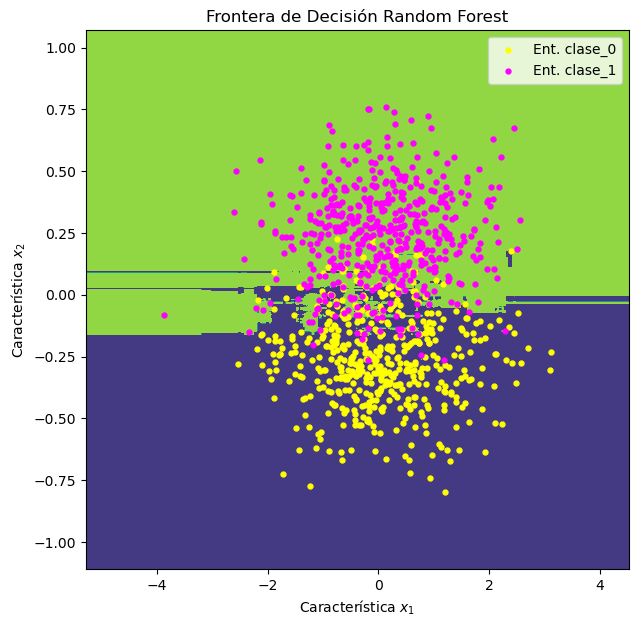

In [8]:
# Figura
fig, ax = plt.subplots(figsize = (7, 7))

# Valores de los parámetros de entrada
clase_0 = 0  
clase_1 = 1
# Clase 0 en amarillo, clase 1 en magenta
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Frontera de Decisión Random Forest"
titulo_eje_x = r"Característica $x_1$"
titulo_eje_y = r"Característica $x_2$"
simbolo = '.'
tamano_simbolo = 50
adicion_frontera = 1

# Llamamos a la función para dibujar la frontera de decisión
dibuja_frontera_decision(x, clasificador_random_forest, y, clase_0, clase_1, 
                         colores, etiqueta_leyenda_cero,
                         etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                         simbolo, tamano_simbolo, adicion_frontera)

**Ejercicio 5: valores de las métricas para el caso de dos características y el clasificador Random Forest**

Escriba el código para obtener el acierto del clasificador entrenado y el resto de métricas: exactitud, precisión y sensibilidad.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Asumiendo que y son las etiquetas reales y y_pred son las predicciones del modelo

def precision_recall_curve(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    print(f"\n Accuracy: {accuracy} \n Precision: {precision }\n Recall: {recall}" )
    return accuracy, precision, recall

**Ejercicio 6: gráfica de precisión vs. sensibilidad y curva ROC para el clasificador Random Forest**

Obtenga la gráfica de precisión vs. sensibilidad y la curva ROC, obtenga también el valor de AUC.

Como el clasificador "Random Forest" no ofrece valores reales en las etiquetas, vamos a emplear como valores reales (y_puntuaciones) los valores de probabilidad de las etiquetas igual a 1. Por lo tanto:

y_puntuaciones = y_sal_probabilidades[:, 1]

¿A la vista de los resultados, se puede calificar como un buen clasificador?

¿Es mejor que el clasificador lineal?

El área bajo la curva es (AUC):
1.0


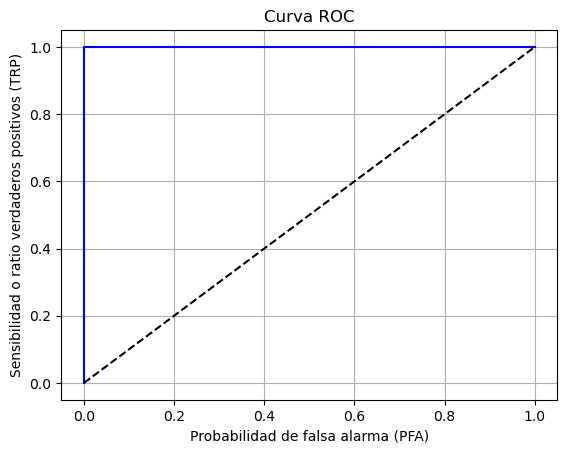

In [10]:
y_puntuaciones = y_sal_probabilidades[:, 1]
prob_falsa_alarma, ratio_verdaderos_positivos, umbrales = roc_curve(y, y_puntuaciones)

dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos)

print('El área bajo la curva es (AUC):')
AUC = roc_auc_score(y, y_puntuaciones)
decimales = 4
print(round(AUC,decimales))

**Conjuntos de entrenamiento y test**

Tal como estudiamos en el ejemplo de regresión, para evaluar la capacidad de generalización del modelo es necesario emplear un conjunto de datos nunca visto por el modelo en su entrenamiento. Vamos a generar un conjunto de entrenamiento y test para el problema de clasificación mediante la función *train_test_split()*


**Ejercicio 7: generación de conjuntos de entrenamiento y test**

Genere conjuntos de entrenamiento y test en el problema de clasificación en una proporción 80%-20%.

In [11]:
# Importación del método train_test_split para separar el conjunto total de datos
# en un conjunto de entrenamiento y de test
from sklearn.model_selection import train_test_split

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

**Frontera de decisión con datos de entrenamiento y test para el clasificador lineal**

En primer lugar, vamos a visualizar la frontera de decisión y los datos de entrenamiento y test para el clasificador lineal. Primero se dibujan los datos de entrenamiento añadiendo la frontera de decisión para todo el espacio y a continuación se dibujan los datos de test sin añadir la frontera de decisión, ya que está dibujada anteriormente.

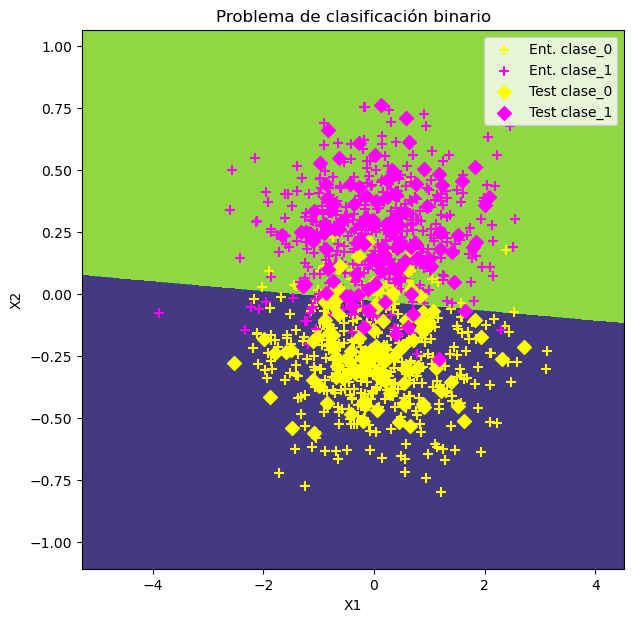

In [12]:
# Estimación de los parámetros con el conjunto de entrenamiento
clasificador_sgd.fit(x_ent, y_ent)

# Predicción para el conjunto de entrenamiento y de test
y_sal_ent = clasificador_sgd.predict(x_ent)
y_sal_test = clasificador_sgd.predict(x_test)

# Gráfica de la frontera de decisión 
# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0
clase_1 = 1
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Problema de clasificación binario"
titulo_eje_x = "X1"
titulo_eje_y = "X2"
simbolo = '+'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x_ent, clasificador_sgd, y_ent, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)

simbolo = 'D'
tamano_simbolo = 50
adicion_frontera = 0
etiqueta_leyenda_cero = 'Test clase_0'
etiqueta_leyenda_uno = 'Test clase_1'
dibuja_frontera_decision(x_test, clasificador_sgd, y_test, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)

**Ejercicio 8: métricas para el clasificador lineal en el conjunto de entrenamiento y test. Curva ROC y valor de AUC para el clasificador lineal en el conjunto de entrenamiento y test**

En este ejercicio obtenga las métricas para el clasificador lineal tanto en el conjunto de entrenamiento como en el de test. Asimismo, obtenga la curva ROC y el valor de AUC para los dos conjuntos.

¿Es un clasificador que generalice adecuadamente?

In [13]:
y_puntuaciones = 

SyntaxError: invalid syntax (2532245561.py, line 1)

**Ejercicio 9: frontera de decisión con datos de entrenamiento y test para el clasificador Random Forest**

En este ejercicio se pide dibujar los conjuntos de entrenamiento y test y la frontera de decisión para el clasificador "Random Forest".

¿Existen ejemplos de test mal clasificados? ¿Cómo cree que afectará este hecho a las métricas y curva ROC del conjunto de test?

**Ejercicio 10: métricas para el clasificador Random Forest en el conjunto de entrenamiento y test. Curva ROC y valor de AUC para el clasificador Random Forest en el conjunto de entrenamiento y test**

En este ejercicio obtenga las métricas para el clasificador "Random Forest" tanto en el conjunto de entrenamiento como en el de test. Asimismo, obtenga la curva ROC y el valor de AUC para los dos conjuntos.

¿Es un clasificador que generalice adecuadamente? ¿Se obtiene el mismo rendimiento en el conjunto de entrenamiento y en el de test?

**Generación estratificada de los conjuntos de entrenamiento y de test**

En la generación del conjunto de entrenamiento y test se ha utilizado la función *train_test_split()* que selecciona las muestras de cada conjunto de forma aleatoria. Esta función intenta mantener, en la medida de lo posible, las proporciones de clase en los conjuntos de entrenamiento y test. Este aspecto es clave, ya que permite entrenar los modelos bajo las mismas condiciones que se encuentran en los datos originales. Sin embargo, en el caso de datos altamente desbalanceados, puede darse caso de que los conjuntos de training y test presenten proporciones de clase diferentes a las originales. En este caso, para garantizar que se mantengan dicha proporciones, hay que realizar particiones *estratificadas*, es decir, particiones que mantengan las proporciones de clases del conjunto de datos origionales en los particiones de entrenamiento y test. Esto se consigue poniendo el parámtros `stratify=y`.  

En el siguiente ejemplo vamos a generar un conjunto de datos sintéticos altamente desbalanceados, forzando a que el 90% de las instancias pertenezcan a una clase, mediante el parámetro `weights=[0.9]`.

In [ ]:
from sklearn.model_selection import train_test_split

# Número de puntos
numero_puntos = 20

# Generamos las dos clases
x, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=0.50, weights=[0.9], random_state=123)

# Conjuntos de entrenamiento y test
# El conjunto de entrenamiento es un 80% del total
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

In [ ]:
print(f"Porcentaje de la clase 0 en el conjunto de inicial {y[y==0].shape[0]/y.shape[0]}")
print(f"Porcentaje de la clase 0 en el conjunto de entrenamiento {y_ent[y_ent==0].shape[0]/y_ent.shape[0]}")
print(f"Porcentaje de la clase 0 en el conjunto de test {y_test[y_test==0].shape[0]/y_test.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de inicial {y[y==1].shape[0]/y.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de entrenamiento {y_ent[y_ent==1].shape[0]/y_ent.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de test {y_test[y_test==1].shape[0]/y_test.shape[0]}")

Porcentaje de la clase 0 en el conjunto de inicial 0.95
Porcentaje de la clase 0 en el conjunto de entrenamiento 0.9375
Porcentaje de la clase 0 en el conjunto de test 1.0
Porcentaje de la clase 1 en el conjunto de inicial 0.05
Porcentaje de la clase 1 en el conjunto de entrenamiento 0.0625
Porcentaje de la clase 1 en el conjunto de test 0.0


Como podemos ver, en este caso no existen instancias de la clase 1 en el conjunto de test. Para forzar a que la clase 1 esté representada en el conjunto de test, debemos forzar la estratificación de la partición. 

In [ ]:
x_ent_stra, x_test_stra, y_ent_stra, y_test_stra  = train_test_split(x, y, test_size=0.2,stratify=y)

print(f"Porcentaje de la clase 0 en el conjunto de inicial {y[y==0].shape[0]/y.shape[0]}")
print(f"Porcentaje de la clase 0 en el conjunto de entrenamiento {y_ent_stra[y_ent_stra==0].shape[0]/y_ent_stra.shape[0]}")
print(f"Porcentaje de la clase 0 en el conjunto de test {y_test_stra[y_test_stra==0].shape[0]/y_test_stra.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de inicial {y[y==1].shape[0]/y.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de entrenamiento {y_ent_stra[y_ent_stra==1].shape[0]/y_ent_stra.shape[0]}")
print(f"Porcentaje de la clase 1 en el conjunto de test {y_test_stra[y_test_stra==1].shape[0]/y_test_stra.shape[0]}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Evaluación del rendimiento y selección de parámetros mediante validación cruzada**

Otra limitación en la forma en la que hemos empleado `train_test_split()` radica en que sólo generamos un único conjunto de entrenamiento y test, lo que puede dar una falsa impresión sobre el rendimiento de la técnica de machine learning: la técnica podría ser muy precisa para un determinado conjunto de test y ser menos precisa para otro conjunto de test extraído del mismo conjunto total de datos. En las siguientes celdas de código se ha copiado el código para ejecutar la visualización de la frontera de decisión, eliminando las semillas del `random_state` para que se generen diferentes particiones. Ejecute varias veces el código y compruebe que la frontera de decisión cambia, lo que conduce a precisiones diferentes de entrenamiento y test diferentes.


In [ ]:
# EJECUTE ESTA CELDA SÓLO UNA VEZ
from sklearn.metrics import accuracy_score
# Número de puntos
numero_puntos = 1000

# Generamos las dos clases
x2_0, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=1.0
)

In [ ]:
# EJECUTE ESTA CELDA VARIAS VECES

# Conjuntos de entrenamiento y test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Estimación de los parámetros con el conjunto de entrenamiento
clasificador_sgd.fit(x_ent, y_ent)

# Predicción para el conjunto de entrenamiento y de test
y_sal_ent = clasificador_sgd.predict(x_ent)
y_sal_test = clasificador_sgd.predict(x_test)

# Exactitud del modelo en el conjunto de entrenamiento y en test. 
acc_ent = accuracy_score(y_sal_ent,y_ent)
acc_test = accuracy_score(y_sal_test,y_test)

print(f"Accuracy en el conjunto de entrenamiento: {acc_ent}")
print(f"Accuracy en el conjunto de test: {acc_test}")


# Gráfica de la frontera de decisión 
# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0
clase_1 = 1
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Problema de clasificación binario"
titulo_eje_x = "X1"
titulo_eje_y = "X2"
simbolo = '+'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x_ent, clasificador_sgd, y_ent, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)

simbolo = 'D'
tamano_simbolo = 50
adicion_frontera = 0
dibuja_frontera_decision(x_test, clasificador_sgd, y_test, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)


Como se ha visto en teoría, se puede evaluar el rendimiento del método de machine learning de una forma más completa mediante el empleo de la validación cruzada. Esta técnica es especialmente útil en los casos en los que se dispone de pocas muestras en el conjunto de entrenamiento. En la siguiente figura se muestra el fundamento de esta técnica: el conjunto total de datos se divide en subconjuntos o *folds* y en cada iteración se entrena la técnica con todos los subconjuntos menos uno que se reserva para validación (test). La precisión final es la media de las precisiones alcanzadas en las iteraciones del método de validación cruzada.

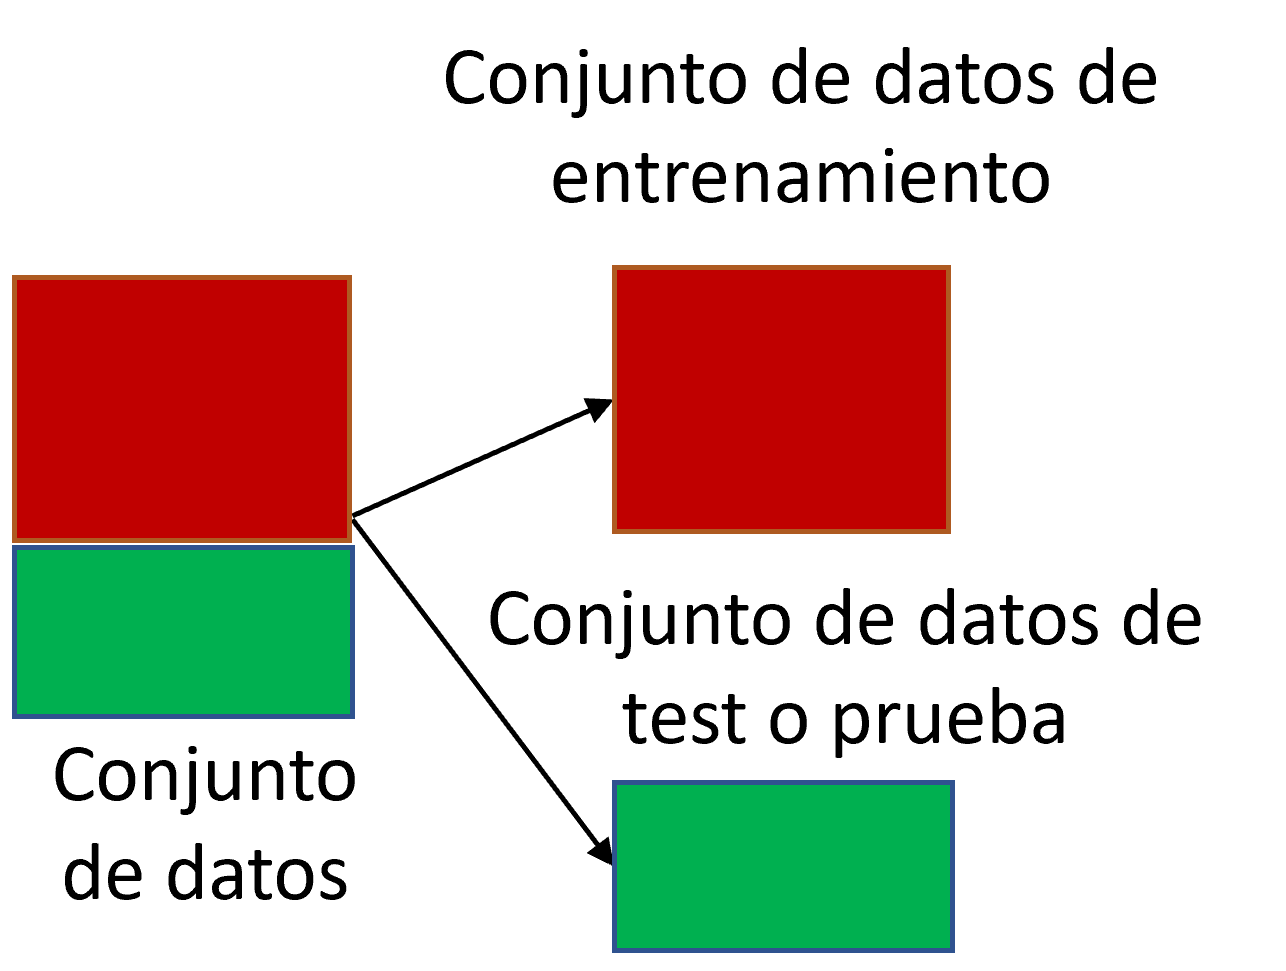


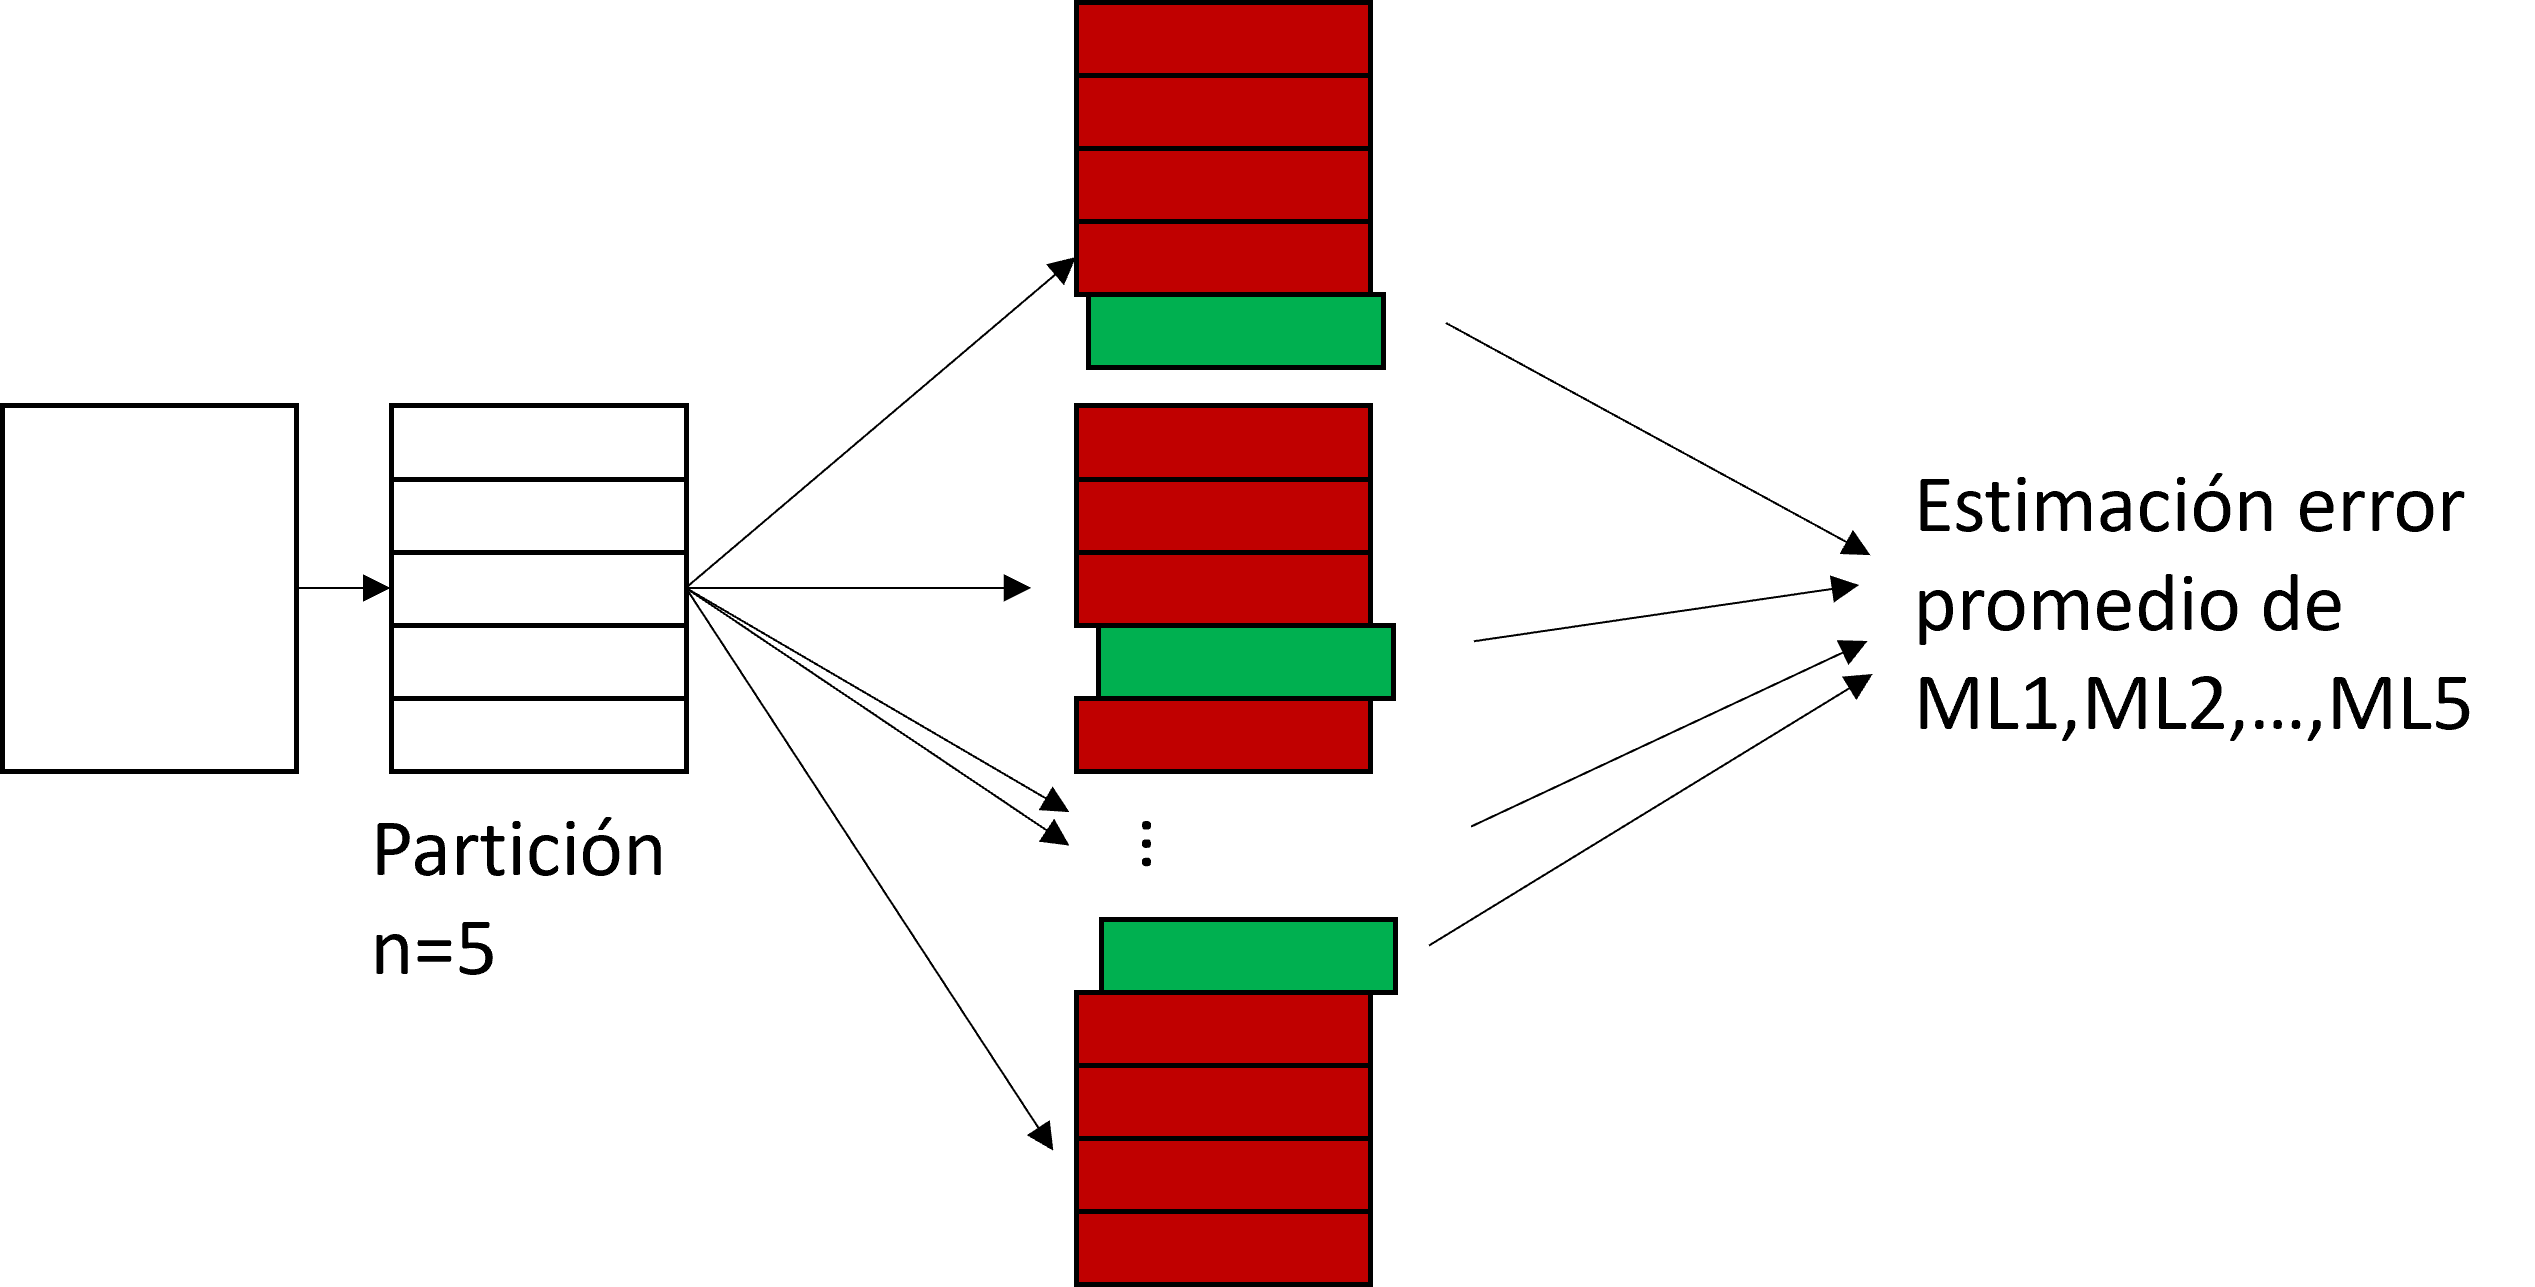


En la siguiente celda se muestra el código para aplicar la función de validación cruzada `cross_val_score()`. Uno de los parámetros de esta fucnión es la métrica que se quiere calcular. En nuestro caso vamos a utilizar la exactitud (accuracy).

In [ ]:
# Importamos la clase cross_val_score para realizar la validación cruzada
from sklearn.model_selection import cross_val_score

# El número de subconjuntos (folds) y por tanto el número de veces que se ejecuta el entrenamiento
# El valor por defecto es 5
numero_subconjuntos = 5
# Como función de utilidad tomamos la exactitud total 
# (Las opciones disponibles se pueden consultar 
# en https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
metrica = "accuracy"

# El modelo es el clasificador lineal entreado con SGD
# EL conjunto de datos de entrada que se a dividir en diferentes subconjuntos (folds)
# La función cross_val_score devuelve un nd-array de numpy en el que cada elemento es el acierto de 
# en el conjunto de test
# Se emplean todos los datos x e y
acierto = cross_val_score(clasificador_sgd, x, y,
                         scoring=metrica, cv=numero_subconjuntos)

# Mostramos los resultados
print("El acierto de cada subconjunto es:")
print(acierto)
# Media
print("La media del acierto es:")
print(round(acierto.mean(),3))
# Desviación estándard 
print("La desviación estándar del acierto es:")
print(round(acierto.std(),3))

**Estimación del mejor conjunto de hiperparámetros** 

Hasta el momento en el problema de clasificación hemos utilizado una configuración fija de las técnicas de machine learning para evaluar su rendimiento. Ahora bien, dicha configuración puede ser cambiada de modo que unas configuraciones pueden ofrecer un mejor rendimiento que otras.
  

Para estimar el mejor conjunto de hiperparámetros y comprobar la capacidad de generalización de la mejor configuración hay que dividir el conjunto de datos en tres conjuntos: entrenamiento, validación y test. Los dos primeros sirven para seleccionar la mejor configuración y el último, como siempre, sirve para comprobar la capacidad de generalización. Se puede aplicar la técnica de validación cruzada sobre los datos no empleados para el test o prueba final, especialmente si no se disponen de muestras suficientes para obtener los tres conjuntos.

Este proceso puede ser tedioso si se realiza a mano. Se puede realizar mediante un bucle iterativo, no obstante, la bilioteca *Scikit-learn* posee una clase llamada *GridSearchCV()* que realiza las operaciones necesarias:


+ Para una serie de valores de los hiperparámetros de la técnica de machine learning crea todas las posibles combinaciones. 

+ Para cada combinación entrena y valida la técnica empleada mediante validación cruzada. El número de subconjuntos o *folds* es un parámetro de la clase *GridSearchCV*. 

+ Devuelve los resultados de error de validación de todas las combinaciones.


El clasificador lineal puede emplear diferentes funciones de pérdida ("loss functions"). El algoritmo de gradiente intenta minimizar la función de pérdida en cada iteración del algoritmo ya que dicha función mide la diferencia entre cada una de las etiquetas del conjunto de entrenamiento y los valores de salida del clasificador. Así, vamos a estimar la precisión para el clasificador lineal si se emplean tres funciones de pérdida diferentes: *hinge* que es la empleada por defecto, *log_loss* y *modified_huber*.

Vamos a tomar número de subconjuntos o *folds* igual a 5 como en el ejemplo de validación cruzada. 


In [ ]:
# Importamons la biblioteca para generar todas las combinaciones de parámetros de entrenamiento
from sklearn.model_selection import GridSearchCV

# Los valores de los hiperparámetros se guardan en un diccionario o en una lista de diccionarios
rejilla_hiperparametros = [
{'loss': ['hinge', 'log_loss', 'modified_huber']},
]

# Número de subconjuntos o folds para la validación cruzada
numero_subconjuntos = 5
# Función utilidad
funcion_utilidad = "accuracy"
# El modelo a evaluar es un clasificador lineal
modelo_evaluar = SGDClassifier()

# Se crean todas las configuraciones del perceptrón multicapa
grid_search = GridSearchCV(modelo_evaluar, rejilla_hiperparametros, cv=numero_subconjuntos,
                           scoring=funcion_utilidad, return_train_score=True)

# Ahora el conjunto de datos de entrenamiento es empleado con grid_search 
# y el conjunto de test se empleará posteriormente una vez seleccionada la mejor configuración

# Conjuntos de entrenamiento y test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Entrenamiento y validación de todas las configuraciones
grid_search.fit(x_ent, y_ent)

# GridSearchCV devuelve un diccionario
resultados = grid_search.cv_results_
# Transformamos en un DataFrame para visualizar de forma más sencilla los resultados
resultados_dataframe = pd.DataFrame.from_dict(resultados)
# La mejor configuración es:
print(resultados_dataframe)


El siguiente código muestra cómo obtener la media y la desviación estándar de cada configuración así como el mejor resultado (puede haber un empate entre varias configuraciones).

In [ ]:
# La media y la desviación estándar son:
print("La media de los resultados de test es:")
print(resultados['mean_test_score'])
print("")
print("La desviación estándar de los resultados de test es:")
print(resultados['std_test_score'])
print("")
# La media del valor de la función de utilidad para la mejor configuración
print("El mejor resultado en el test es:")
print(round(grid_search.best_score_,4))

La mejor configuración de entre las probadas se puede extraer directamente con los métodos *best_params_* y *best_estimator_*

In [ ]:
# Mejores parámetros de entre los probados
print('La mejor configuración es:')
print(grid_search.best_params_)

# La configuración con los mejores parámetros
grid_search.best_estimator_

## Problema de regresión. 



**Generación de datos**

Al igual que en clasificación vamos a generar datos de forma sintética.

In [ ]:
# Función para generar datos para el problema de regresión
ini_x = 0
fin_x = 2*np.pi
num_puntos = 100
paso = (fin_x-ini_x)/num_puntos
x_reg = np.arange(start=ini_x, stop=fin_x, step=paso)
x_reg = x_reg.reshape(-1,1)

# Función seno a la que añadimos ruido según una distribución normal:(gaussiana)
y_limpia = np.sin(x_reg)
reduccion_ruido = 5
y_reg = np.sin(x_reg) + np.random.randn(num_puntos, 1)/reduccion_ruido

plt.figure(figsize=(5, 5))
plt.plot(x_reg, y_reg, "b-", label='Datos para aproximar')
plt.plot(x_reg, y_limpia, "g--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Aproximador polinómico: utilización de `Pipeline()`

Para generar un polinomio con `Scikit-learn` se deben realizar dos operaciones: elevar a la potencia deseada los datos y aplicar un regresor lineal. La aplicación de varias operaciones se puede realizar en un mismo proceso mediante la clase `Pipeline()`. A continuación creamos un "canal de operaciones" o "pipeline" para generar un polinomio de grado 3, generamos los conjuntos de entrenamiento y de test y obtenemos los resultados de la aproximación.

In [ ]:
# Importamos la clase para aplicar un ajuste lineal a los datos
from sklearn.linear_model import LinearRegression

# Importamos la clase para generar el polinomio
from sklearn.preprocessing import PolynomialFeatures

# Importamos la clase Pipeline 
from sklearn.pipeline import Pipeline

# Instanciamos la clase que eleva a la potencia deseada
poly = PolynomialFeatures(degree=3)

# Instanciamos el aproximador lineal
aproximador_lineal = LinearRegression()

# Generamos el pipeline: aplicará los procedimientos en el orden que indiquemos
pipeline = Pipeline([('elevar_a_potencias', poly), ('regresor_lineal', aproximador_lineal)])

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Generamos los parámetros del modelo
pipeline.fit(x_ent, y_ent)

# Obtenemos las predicciones para los conjuntos de entrenamiento y test
y_sal_ent = pipeline.predict(x_ent)
y_sal_test = pipeline.predict(x_test)


**Ejercicio 11: resultados del polinomio de grado 3**

Ejecute varias veces la generación de conjuntos de entrenamiento y test y la obtención del polinomio de grado 3, obtenga en cada ocasión las métricas de error de entrenamiento y test y dibuje los resultados.

¿Cambia la precisión del modelo?

#### Ejercicio 12: Validación cruzada en el problema de regresión

Como hemos visto en el problema de clasificación puede ser conveniente utilizar la validación cruzada para estimar de forma más precisa el rendimiento de la técnica de machine learning. Aplique validación cruzada en el problema de regresión, utilice 5 folds.

En el parámetro `estimator` de `cross_val_score()` utilice la instancia creada `pipeline`. De este modo, en cada iteración del algoritmo de validación cruzada se podrá crear y calcular los parámetros del polinomio de grado 3. Como `cross_val_score()`  emplearemos el valor negativo del error cuadrático medio: `neg_mean_squared_error`. Esto es así, ya que cuando entrenamos un modelo mediante validación cruzada, en `scikit-leran`, el mejor modelo es el que máximiza la métrica. Como en problemas de regresión, tratamos de minimizar métricas como el RSME, MAE o MSE, para poder evaluar modelos debemos utilizar sus versiones negativas. 

Compruebe que los valores son acordes a los valores obtenidos en el ejercicio anterior.

#### Ejercicio 13: estimación de los mejores hiperparámetros con `GridSearchCV()` 

Finalmente, vamos a obtener el mejor polinomio de un conjunto de polinomios mediante la clase `GridSearchCV()` con la siguiente configuración:

- El número de particiones será 5.
- Utilice la instancia `pipeline` creada para generar el polinomio: ahora no se puede indicar en `pipeline` el grado del polinomio, ya que es un hiperparámetro que varía. Por ello, en `elevar_a_potencias` escribiremos simplemente `PolynomialFeatures()`. Además, para escribir la rejilla de hiperparámetros deberemos escribir: `elevar_a_potencias__degree`: e introducir los valores deseados.
- Utilice `neg_mean_squared_error` como métrica.
- El grado del polinomio variará desde 1 hasta 30.

Una vez finalizado el proceso, obtenga el mejor polinomio: ¿el resultado coincide con el obtenido en el último ejercicio de la primera sesión?

In [ ]:
# Número de subconjuntos o folds para la validación cruzada
numero_folds = 5
# Función utilidad
métrica = 'neg_mean_squared_error'

# Generamos el pipeline
poly = PolynomialFeatures()
pipeline_reg = Pipeline([('elevar_a_potencias', poly), ('regresor_lineal', aproximador_lineal)])

# Los valores de los hiperparámetros se guardan en un diccionario o en una lista de diccionarios
rejilla_hiperparametros_poly = [
{'elevar_a_potencias__degree': np.arange(1,30,1)},
]

# Se crean todas las configuraciones del perceptrón multicapa
grid_search_poly = GridSearchCV(pipeline_reg, rejilla_hiperparametros_poly, cv=numero_folds,
                           scoring=metrica, return_train_score=True)

# Ahora el conjunto de datos de entrenamiento es empleado con grid_search 
# y el conjunto de test se empleará posteriormente una vez seleccionada la mejor configuración
# Como esta partición se ha realizado anteriormente se puede reutilizar

# Entrenamiento y validación de todas las configuraciones
grid_search_poly.fit(x_reg_ent, y_reg_ent)


# Mejores parámetros de entre los probados
print(grid_search_poly.best_params_)

# La configuración con los mejores parámetros
grid_search_poly.best_estimator_

NameError: name 'PolynomialFeatures' is not defined